Note: through this exam you should only make use of numpy, matplotlib and pandas.

#Q1

[0.80596223 1.05547495] [-1.37915101 -0.77131269]


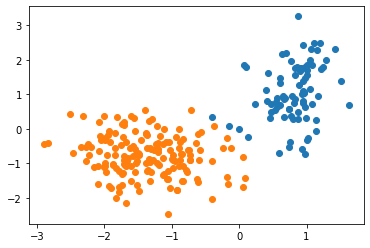

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d1.csv")
x1 = df['x1']
x2 = df['x2']
X = np.array([x1, x2]).T

#Continue here...
def l2(p1, p2):
  return (p2[0] - p1[0])**2 + (p2[1] - p1[1])**2

mean0, mean1 = [-1, -1], [2, 1]
y = []
for i in range(5):
  y = []
  y = np.array([int(l2(x, mean0) < l2(x, mean1)) for x in X])
  mean0 = np.mean(X[y == 0], axis=0)
  mean1 = np.mean(X[y == 1], axis=0)

print(mean0, mean1)
fig, ax = plt.subplots()
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1])

#Q2

[-1.34920307 -0.75202036] [0.85157853 1.10581811]
[[0.36348015 0.        ]
 [0.         0.35494227]] [[0.07902776 0.        ]
 [0.         0.67727456]]


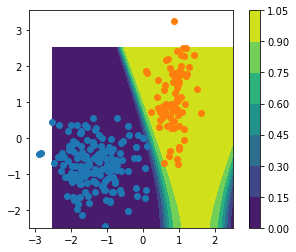

In [63]:
#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

df = pd.read_csv("http://pogo.software/me4ml/rjteh/d2.csv")
x1 = df['x1']
x2 = df['x2']
clTrue = df['y']

#Continue 2(a) and 2(b) here...
X = np.array([x1, x2]).T
mean1 = np.mean(X[clTrue == 1], axis=0)
mean2 = np.mean(X[clTrue == 2], axis=0)
std1 = np.std(X[clTrue == 1], axis=0)
std2 = np.std(X[clTrue == 2], axis=0)
covar1 = np.array([[std1[0]**2, 0], [0, std1[1]**2]])
covar2 = np.array([[std2[0]**2, 0], [0, std2[1]**2]])
print(mean1, mean2)
print(covar1, covar2)

Xgrid, x1line, x2line = gen_sample_grid(200, 200, 2.5)
p_x_w1 = prob_density_2d(Xgrid, mean1[0], mean1[1], covar1)
p_x_w2 = prob_density_2d(Xgrid, mean2[0], mean2[1], covar2)
p_w1 = len(clTrue[clTrue == 1]) / len(clTrue)
p_w2 = len(clTrue[clTrue == 2]) / len(clTrue)
p_w1_x = p_x_w1 * p_w1 / (p_x_w1 * p_w1 + p_x_w2 * p_w2)
p_w2_x = p_x_w2 * p_w2 / (p_x_w1 * p_w1 + p_x_w2 * p_w2)

fig, ax = plt.subplots()
# plt.contourf(x1line, x2line, p_w1_x.reshape([200, 200]))
plt.contourf(x1line, x2line, p_w2_x.reshape([200, 200]))
ax.scatter(X[clTrue == 1][:, 0], X[clTrue == 1][:, 1])
ax.scatter(X[clTrue == 2][:, 0], X[clTrue == 2][:, 1])
ax.set_aspect('equal')
plt.colorbar()

#Q2 (c)

Principal components will be aligned with each axis as there is no covariance between the two datasets.

#Q2 (d)
No, as the point is much further from the training data. Therefore the normal distribution will be extrapolating into an area of very low probability.


#Q3

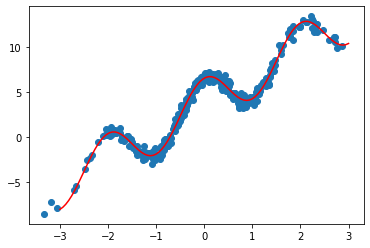

In [69]:
from re import M
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d3.csv")
x = df['x']
y = df['y']
#Continue here...
m = len(x)


M00 = sum(x**2)
M01 = sum(x * np.cos(np.pi * x))
M02 = sum(x)
M10 = sum(x * np.cos(np.pi * x))
M11 = sum(np.cos(np.pi * x)**2)
M12 = sum(np.cos(np.pi * x))
M20 = sum(x)
M21 = sum(np.cos(np.pi * x))
M22 = m

M = np.array([[M00, M01, M02], [M10, M11, M12], [M20, M21, M22]])

Y00 = sum(x * y)
Y10 = sum(y * np.cos(np.pi * x))
Y20 = sum(y)

Y = np.array([Y00, Y10, Y20]).T

a, b, c = np.matmul(np.linalg.inv(M), Y)

x_sample = np.linspace(-3, 3, 100)
y_fit = a * x_sample + b * np.cos(np.pi * x_sample) + c

fig, ax = plt.subplots()
ax.plot(x_sample, y_fit, c='r')
ax.scatter(x, y)

#Q4 (a)

In [81]:
#Continue here... 
#or write out as a text field if you wish.

p1 = np.array([0, 0])
p2 = np.array([0.4, 1])
p3 = np.array([1, 0])

mp1 = (p1 + p3) / 2
mp2 = (p2 + p3) / 2

m = (mp2[1] - mp1[1])/(mp2[0] - mp1[0])
c = mp1[1] - m * mp1[0]
print(f'y = {m}x + {c}')


y = 2.5000000000000004x + -1.2500000000000002


#Q4 (b)

move point (0, 0) to (0.4, 0).